<a href="https://colab.research.google.com/github/Clarke-Jools-36/Clarke-Jools-36/blob/main/jwst_pipeline_tutorial_stage_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this workshop you will be taking raw JWST data from the NIRSpec Prism instrument and processing it to produce a transmission spectrum of an exoplanet.  The data was taken in July 2022 as part of the Early Release Science program and is publicly available.  A single primary transit observation was taken of WASP-39 b.  We will be using a customised "pipeline" that will use elements of the official JWST pipeline and some custom elements.


**First mount your drive** by clicking on the third icon on the left.  This will allow you to access the JWST_practical folder.  This folder contains all the data we need for this tutorial.   

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Next we must install the official JWST pipeline software package.
**This cell will run and end with an intentional error (run time will start again). Just ignore this and go to the next cell.**

In [ ]:
!pip install jwst
import os
os.kill(os.getpid(), 9)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.0/15.0 MB 56.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 KB 8.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 KB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.7/866.7 KB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 946.7/946.7 KB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 1.0 MB/s e

Unzip the JWST_practical folder.

In [1]:
!unzip '/content/drive/MyDrive/JWST_practical.zip' -d '/content'

Archive:  /content/drive/MyDrive/JWST_practical.zip
   creating: /content/JWST_practical/
  inflating: /content/__MACOSX/._JWST_practical  
  inflating: /content/JWST_practical/.DS_Store  
  inflating: /content/__MACOSX/JWST_practical/._.DS_Store  
   creating: /content/JWST_practical/crds_cache/
  inflating: /content/__MACOSX/JWST_practical/._crds_cache  
  inflating: /content/JWST_practical/jw01366004001_04101_00001-seg002_nrs1_uncal_decimated.fits  
  inflating: /content/__MACOSX/JWST_practical/._jw01366004001_04101_00001-seg002_nrs1_uncal_decimated.fits  
  inflating: /content/JWST_practical/bin_spectrum.py  
  inflating: /content/__MACOSX/JWST_practical/._bin_spectrum.py  
  inflating: /content/JWST_practical/ExoCTK_results slc 1.txt  
  inflating: /content/__MACOSX/JWST_practical/._ExoCTK_results slc 1.txt  
  inflating: /content/JWST_practical/jw01366004001_04101_00001-seg004_nrs1_uncal_decimated.fits  
  inflating: /content/__MACOSX/JWST_practical/._jw01366004001_04101_00001-se

Next we need to set up these two environmental variables for the pipeline. Environment variables store data that's used by the operating system and other programmes. First look  at all the existing enviromental variables.

In [2]:
import os
os.environ

environ{'SHELL': '/bin/bash',
        'NV_LIBCUBLAS_VERSION': '11.11.3.6-1',
        'NVIDIA_VISIBLE_DEVICES': 'all',
        'COLAB_JUPYTER_TRANSPORT': 'ipc',
        'NV_NVML_DEV_VERSION': '11.8.86-1',
        'NV_CUDNN_PACKAGE_NAME': 'libcudnn8',
        'CGROUP_MEMORY_EVENTS': '/sys/fs/cgroup/memory.events /var/colab/cgroup/jupyter-children/memory.events',
        'NV_LIBNCCL_DEV_PACKAGE': 'libnccl-dev=2.16.2-1+cuda11.8',
        'NV_LIBNCCL_DEV_PACKAGE_VERSION': '2.16.2-1',
        'VM_GCE_METADATA_HOST': '169.254.169.253',
        'HOSTNAME': 'd2e16613e5ac',
        'TBE_RUNTIME_ADDR': '172.28.0.1:8011',
        'GCE_METADATA_TIMEOUT': '3',
        'NVIDIA_REQUIRE_CUDA': 'cuda>=11.8 brand=tesla,driver>=450,driver<451 brand=tesla,driver>=470,driver<471 brand=unknown,driver>=470,driver<471 brand=nvidia,driver>=470,driver<471 brand=nvidiartx,driver>=470,driver<471 brand=geforce,driver>=470,driver<471 brand=geforcertx,driver>=470,driver<471 brand=quadro,driver>=470,driver<471 brand=q

Now add these two variables.  What do you think they do?

In [3]:
os.environ['CRDS_SERVER_URL']= 'https://jwst-crds.stsci.edu'
os.environ['CRDS_PATH'] = '/content/JWST_practical/crds_cache' 

Now check they've been added correctly.  Put in the code you think you need to check this below.

In [6]:
#check that the jwst environmental variables are in place correctly:

os.environ

environ{'SHELL': '/bin/bash',
        'NV_LIBCUBLAS_VERSION': '11.11.3.6-1',
        'NVIDIA_VISIBLE_DEVICES': 'all',
        'COLAB_JUPYTER_TRANSPORT': 'ipc',
        'NV_NVML_DEV_VERSION': '11.8.86-1',
        'NV_CUDNN_PACKAGE_NAME': 'libcudnn8',
        'CGROUP_MEMORY_EVENTS': '/sys/fs/cgroup/memory.events /var/colab/cgroup/jupyter-children/memory.events',
        'NV_LIBNCCL_DEV_PACKAGE': 'libnccl-dev=2.16.2-1+cuda11.8',
        'NV_LIBNCCL_DEV_PACKAGE_VERSION': '2.16.2-1',
        'VM_GCE_METADATA_HOST': '169.254.169.253',
        'HOSTNAME': 'd2e16613e5ac',
        'TBE_RUNTIME_ADDR': '172.28.0.1:8011',
        'GCE_METADATA_TIMEOUT': '3',
        'NVIDIA_REQUIRE_CUDA': 'cuda>=11.8 brand=tesla,driver>=450,driver<451 brand=tesla,driver>=470,driver<471 brand=unknown,driver>=470,driver<471 brand=nvidia,driver>=470,driver<471 brand=nvidiartx,driver>=470,driver<471 brand=geforce,driver>=470,driver<471 brand=geforcertx,driver>=470,driver<471 brand=quadro,driver>=470,driver<471 brand=q

Next we will import some key python packages and processing steps from the jwst package.  We will be accessing FITS files which is a common file format for storing astronomical data.

In [7]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
# jwst pipeline packages
import jwst
from jwst.dq_init import DQInitStep
from jwst.saturation import SaturationStep
from jwst.superbias import SuperBiasStep
from jwst.ipc import IPCStep                                                                                    
from jwst.refpix import RefPixStep                                                                
from jwst.linearity import LinearityStep
from jwst.persistence import PersistenceStep
from jwst.dark_current import DarkCurrentStep
from jwst.jump import JumpStep
from jwst.ramp_fitting import RampFitStep
from jwst.gain_scale import GainScaleStep
from jwst.group_scale import GroupScaleStep
from jwst.stpipe import Step 
from jwst import datamodels

Add a folder to store all our results.  What is the purpose of the the second command... if not...?

In [8]:
output_dir = './drive/MyDrive/jwst_tutorial_output'
if not os.path.exists(output_dir ): 
    os.makedirs(output_dir )

We are now almost ready to run the pipeline.  The pipeline will consist of 3 stages:

Stage 1: We take completely uncalibrated NDRs, remove systematics and noise, and then fit ramps to the processed NDRs.
Stage 2:  We take the ramp images, correct for bad pixels and data points, and produce 1-D stellar spectra vs time
Stage 3:  We fit for white light curves and then spectral light curves, producing the transmission spectrum.

----
We will begin with Stage 1. We create this custom step in the pipeline, which we will apply in a moment.  It applies background subtraction.

In [9]:
class CustomBkg(Step):
    class_alias = "custom_bkg"
    spec = """ """
    def process(self, input):
        # Open the input data model
        with datamodels.RampModel(input) as input_model:
            result = self.custom_bkg_subtraction(input_model)
            input_model.close()
            result.meta.cal_step.custom_bkg = 'COMPLETE'
        return result
    
    def custom_bkg_subtraction(self, input_model):   
        bm = input_model
        data = bm.data
        sup_img = data.sum(axis=1)
        sup_img = np.nanmedian(sup_img,axis=0)
        y_profile = np.sum(sup_img, axis=1)
        y_max = np.argmax(y_profile)
        mask = np.ones_like(sup_img)
        bbox=10
        mask[y_max-bbox: y_max+bbox+1] = np.nan
        sup_img_masked = (mask*sup_img)
        #plt.figure('sup masked')
        #plt.imshow(sup_img_masked,  aspect='auto',  vmin =0, vmax = np.nanpercentile(sup_img_masked, 99))

        for intg in range(data.shape[0]):
            for gp in range(data.shape[1]):
                img = data[intg][gp]
                bkg= img*1
                bkg = np.vstack((bkg[0:6], bkg[-6:]))
                bkg_std = np.nanstd(bkg,axis=0)
                bkg_std = np.tile(bkg_std, (bkg.shape[0], 1))
                bkg_mean = np.nanmean(bkg, axis=0)
                bkg_mean = np.tile(bkg_mean, (bkg.shape[0], 1))
                alpha = 3
                bkg = np.where(bkg> bkg_mean + bkg_std*alpha, np.nan, bkg) 
                bkg = np.where(bkg< bkg_mean - bkg_std*alpha, np.nan, bkg) 
                bkg = np.nanmean(bkg, axis =0)
                img_masked = img*mask
                bkg_median = np.nanmedian(img_masked, axis=0)
                img = img - bkg_median
                data[intg][gp] = img           
        bm.data = data   
        return bm


The data going into Stage 1 are from .uncal FITS files.  We will have a look at the content of these and FITS files structures together in the session.  The timeline was divided into 4 segments (4 FITS files), so we need to load these in sequence and pass them through the Stage 1 pipeline.

**We will process segment 1 first to see what the pipeline is doing.** 
 

The files have the tag 'decimated' as I have slightly modified them to make it possible to do this in the time of the workshop.  The original files have 21500 integrations on total!  Each integration lasted 1.377 seconds. It would take hours to process these.  I have therefore binned these down to 215 integrations by taking an average of every 100 integrations.  Other than this the files are the same as the raw files you would get if you downloaded them from the MAST archive. 

Run the Group scale step.  In some JWST modes frames are averaged on-board, and the averaging may be numerically inaccurate in certain cases; this step corrects for that.  However in this case there is no averaging so it has no impact on the data. However we include it here to extract the data from the FITS file and put into a 'datamodel' format which the pipeline uses between steps in the same stage. 

In [10]:
seg = '001'
uncal_file =  '/content/JWST_practical/jw01366004001_04101_00001-seg%s_nrs1_uncal_decimated.fits'%(seg)
result = uncal_file 

step = GroupScaleStep()
step.output_dir = output_dir
result_GroupScaleStep = step.run(result)


2023-03-10 14:22:21,062 - stpipe.GroupScaleStep - INFO - GroupScaleStep instance created.
INFO:stpipe.GroupScaleStep:GroupScaleStep instance created.
2023-03-10 14:22:21,264 - stpipe.GroupScaleStep - INFO - Step GroupScaleStep running with args ('/content/JWST_practical/jw01366004001_04101_00001-seg001_nrs1_uncal_decimated.fits',).
INFO:stpipe.GroupScaleStep:Step GroupScaleStep running with args ('/content/JWST_practical/jw01366004001_04101_00001-seg001_nrs1_uncal_decimated.fits',).
2023-03-10 14:22:21,272 - stpipe.GroupScaleStep - INFO - Step GroupScaleStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './drive/MyDrive/jwst_tutorial_output', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}
INFO:stpipe.GroupScaleStep:Step GroupScaleStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir':

Let's look at the data in the 'datamodel' object.  How would you interpret the 'shape' of the data?  What does each dimension represent?

In [11]:
data = result_GroupScaleStep.data
data.shape

(61, 5, 32, 512)

Let's isolate the first integration and look at the shape of its data array.  What does each dimension represent?

In [12]:
intg = data[0]
intg.shape

(5, 32, 512)

Let's look at the group images in the first integration.

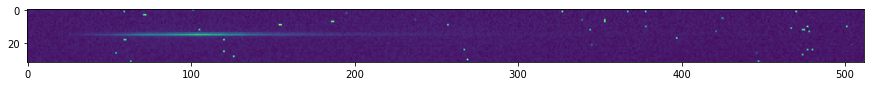

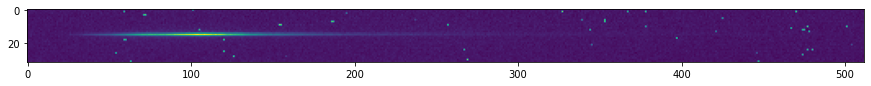

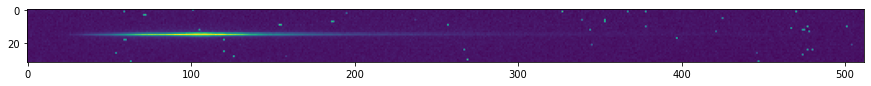

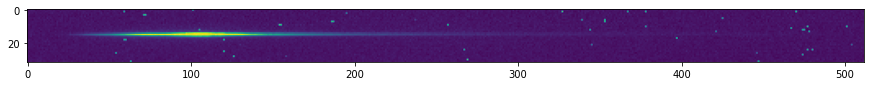

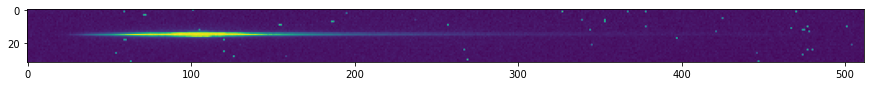

In [13]:
import matplotlib.pyplot as plt
for i in range (5):
  img = intg[i]
  plt.figure('group image %s'%(i), figsize=(15,30))
  plt.imshow(img)

What do you notice going from the first to the final group?  Is this what you expect from 'reading up the ramp'?

The size of the image is 32 x 512 pixels.  This is a 'subarray' on the detector.  The full detector has 2048 x 2048 pixels.  Each pixel is 18 microns across.

---

Next we apply the 'DQInit step'.  This produces a data quality (DQ) array that matches the size and dimensions of the science data array.  It basically keeps track of any 'bad pixels' so we can ignore or fix them later. It does not change the science data.  What are some possible causes of bad pixel counts?

In [14]:
step = DQInitStep()
step.output_dir = output_dir
result_DQInitStep = step.run(result_GroupScaleStep)


2023-03-10 14:25:34,602 - stpipe.DQInitStep - INFO - DQInitStep instance created.
INFO:stpipe.DQInitStep:DQInitStep instance created.
2023-03-10 14:25:34,841 - stpipe.DQInitStep - INFO - Step DQInitStep running with args (<RampModel(61, 5, 32, 512) from jw01366004001_04101_00001-seg001_nrs1_uncal_decimated.fits>,).
INFO:stpipe.DQInitStep:Step DQInitStep running with args (<RampModel(61, 5, 32, 512) from jw01366004001_04101_00001-seg001_nrs1_uncal_decimated.fits>,).
2023-03-10 14:25:34,846 - stpipe.DQInitStep - INFO - Step DQInitStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './drive/MyDrive/jwst_tutorial_output', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}
INFO:stpipe.DQInitStep:Step DQInitStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './drive/MyDrive/jwst_tutorial_ou

Next comes the the 'Saturation' step. This flags any saturated pixels.  Every pixel has a **full well capacity** of electrons it can safely collect.  What happens if this is exceeded?  What circumstances can lead to exceeding the full well capacity?

Actually in this observation we do have a big problem with saturation as the Prism concentrates the spectrum over just 512 pixels in the x-direction. This means at the peak of the stellar spectrum *some groups* in each integration **will exceed the full well capacity** and be flagged as 'saturated' in the DQ array.  These flagged groups are ignored when we fit the ramp below in the 'RampFit' step, and only the unsaturated groups are used.

What does the argument step.n_pix_grow_sat do?


In [15]:
step = SaturationStep()
step.n_pix_grow_sat = 3
step.output_dir = output_dir
result_SaturationStep = step.run(result_DQInitStep)

2023-03-10 14:26:49,664 - stpipe.SaturationStep - INFO - SaturationStep instance created.
INFO:stpipe.SaturationStep:SaturationStep instance created.
2023-03-10 14:26:49,860 - stpipe.SaturationStep - INFO - Step SaturationStep running with args (<RampModel(61, 5, 32, 512) from jw01366004001_04101_00001-seg001_nrs1_uncal_decimated.fits>,).
INFO:stpipe.SaturationStep:Step SaturationStep running with args (<RampModel(61, 5, 32, 512) from jw01366004001_04101_00001-seg001_nrs1_uncal_decimated.fits>,).
2023-03-10 14:26:49,865 - stpipe.SaturationStep - INFO - Step SaturationStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './drive/MyDrive/jwst_tutorial_output', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'n_pix_grow_sat': 3}
INFO:stpipe.SaturationStep:Step SaturationStep parameters are: {'pre_hooks': [], 'post_hooks': [],

Next is the 'SuperBias' step.  Every pixel starts with a bias value and this will be different for each pixel.  To allow the ramps to begin at about the same value these biases can be subtracted by subtracting a pre-determined superbias image.

In [16]:
step = SuperBiasStep()
step.output_dir = output_dir
result_SuperBiasStep = step.run(result_SaturationStep)

2023-03-10 14:27:00,350 - stpipe.SuperBiasStep - INFO - SuperBiasStep instance created.
INFO:stpipe.SuperBiasStep:SuperBiasStep instance created.
2023-03-10 14:27:00,498 - stpipe.SuperBiasStep - INFO - Step SuperBiasStep running with args (<RampModel(61, 5, 32, 512) from jw01366004001_04101_00001-seg001_nrs1_uncal_decimated.fits>,).
INFO:stpipe.SuperBiasStep:Step SuperBiasStep running with args (<RampModel(61, 5, 32, 512) from jw01366004001_04101_00001-seg001_nrs1_uncal_decimated.fits>,).
2023-03-10 14:27:00,502 - stpipe.SuperBiasStep - INFO - Step SuperBiasStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './drive/MyDrive/jwst_tutorial_output', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}
INFO:stpipe.SuperBiasStep:Step SuperBiasStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir

Let's look at the final group image on the first integration before and after this step. What do you notice? *(The image is expanded in the y direction to allow us to examine the image better)*
 

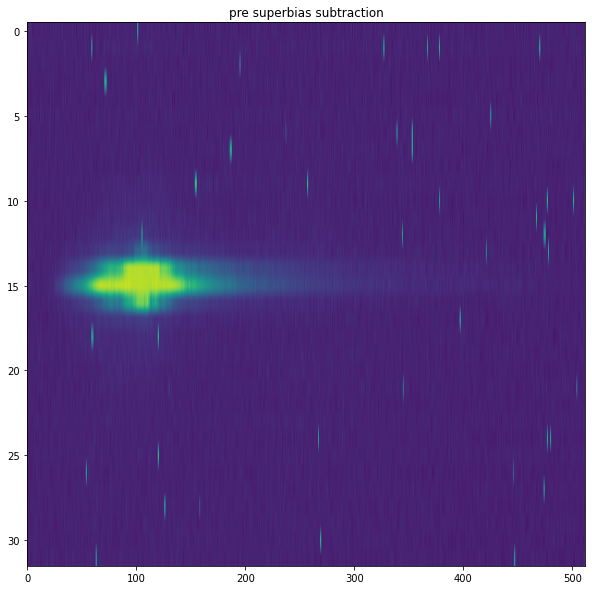

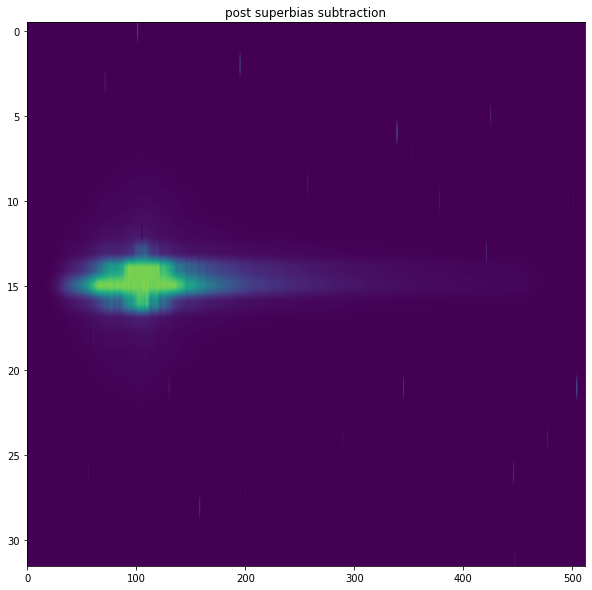

In [17]:
int0 = result_SaturationStep.data[0]
img = int0[4]
plt.figure('group image 4 pre', figsize=(10,10))
plt.title('pre superbias subtraction')
plt.imshow(img, aspect='auto', vmin=-100, vmax=70000);
 
int0 = result_SuperBiasStep.data[0]
img = int0[4]
plt.figure('group image 4 post', figsize=(10,10))
plt.title('post superbias subtraction')
plt.imshow(img, aspect='auto', vmin=-100, vmax=70000);

Even in the post-superbias image we can see some bright pixels randomly scattered.  What could these be due to?

Next we apply a custom background subtraction, which helps to remove 1/f noise from each pixel column.

In [18]:
step = CustomBkg()
step.output_dir = output_dir
result_CustomBkg = step.run(result_SuperBiasStep)

2023-03-10 14:27:56,314 - stpipe.CustomBkg - INFO - CustomBkg instance created.
INFO:stpipe.CustomBkg:CustomBkg instance created.
2023-03-10 14:27:56,534 - stpipe.CustomBkg - INFO - Step CustomBkg running with args (<RampModel(61, 5, 32, 512) from jw01366004001_04101_00001-seg001_nrs1_uncal_decimated.fits>,).
INFO:stpipe.CustomBkg:Step CustomBkg running with args (<RampModel(61, 5, 32, 512) from jw01366004001_04101_00001-seg001_nrs1_uncal_decimated.fits>,).
2023-03-10 14:27:56,543 - stpipe.CustomBkg - INFO - Step CustomBkg parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './drive/MyDrive/jwst_tutorial_output', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}
INFO:stpipe.CustomBkg:Step CustomBkg parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './drive/MyDrive/jwst_tutorial_output', 'outp

Next we apply a linearity correction step.  As the pixel counts get closer and closer to their full well capacity, the count/photon relationship starts to deviate from a fixed linear relationship.  This step takes the raw count and works out from pre-determined formula how much that count must be corrected.  In general the counts are increased.


In [20]:
step = LinearityStep()
step.output_dir = output_dir
result_LinearityStep = step.run(result_CustomBkg)

2023-03-10 14:28:21,574 - stpipe.LinearityStep - INFO - LinearityStep instance created.
INFO:stpipe.LinearityStep:LinearityStep instance created.
2023-03-10 14:28:21,721 - stpipe.LinearityStep - INFO - Step LinearityStep running with args (<RampModel(61, 5, 32, 512) from jw01366004001_04101_00001-seg001_nrs1_uncal_decimated.fits>,).
INFO:stpipe.LinearityStep:Step LinearityStep running with args (<RampModel(61, 5, 32, 512) from jw01366004001_04101_00001-seg001_nrs1_uncal_decimated.fits>,).
2023-03-10 14:28:21,724 - stpipe.LinearityStep - INFO - Step LinearityStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './drive/MyDrive/jwst_tutorial_output', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}
INFO:stpipe.LinearityStep:Step LinearityStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir

Let's plot out a ramp from a random integration and see how the linearity correction changed the ramp values.  Run this cell repeatedly to see different random ramps.

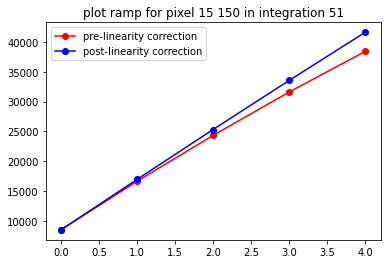

In [30]:
data1 = result_CustomBkg.data
data2 = result_LinearityStep.data

y = 15#int(np.random.uniform(13,17))
x = 150#int(np.random.uniform(200,400))
z = int(np.random.uniform(data1.shape[0]))
plt.figure('plot ramp for pixel %s %s in integration %s'%(y,x,z))
plt.title('plot ramp for pixel %s %s in integration %s'%(y,x,z))
plt.plot(data1[z,:,y,x], 'ro-', label = 'pre-linearity correction')
plt.plot(data2[z,:,y,x], 'bo-', label = 'post-linearity correction')
plt.legend();

Next we do a dark current subtraction.  What is dark current?  Why is it important to subtract this and other backgrounds for a transit observation?

In [22]:
step = DarkCurrentStep()
step.output_dir = output_dir
result_DarkCurrentStep = step.run(result_LinearityStep)

2023-03-10 14:28:41,091 - stpipe.DarkCurrentStep - INFO - DarkCurrentStep instance created.
INFO:stpipe.DarkCurrentStep:DarkCurrentStep instance created.
2023-03-10 14:28:41,293 - stpipe.DarkCurrentStep - INFO - Step DarkCurrentStep running with args (<RampModel(61, 5, 32, 512) from jw01366004001_04101_00001-seg001_nrs1_uncal_decimated.fits>,).
INFO:stpipe.DarkCurrentStep:Step DarkCurrentStep running with args (<RampModel(61, 5, 32, 512) from jw01366004001_04101_00001-seg001_nrs1_uncal_decimated.fits>,).
2023-03-10 14:28:41,299 - stpipe.DarkCurrentStep - INFO - Step DarkCurrentStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './drive/MyDrive/jwst_tutorial_output', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'dark_output': None}
INFO:stpipe.DarkCurrentStep:Step DarkCurrentStep parameters are: {'pre_hooks': [], 'post

Next we fit straight lines to the counts for each pixel ramp in each integration and obtain the gradient.  This gives the **count rate per pixel per integration**.  The count rate is proportional to astronomical flux, so we use that rather than absolute counts as our 'signal'.  What are the other advantages of fitting a slope to a ramp? 

In [31]:
step = RampFitStep()
step.output_dir = output_dir
#step.save_results = True
result_RampFitStep = step.run(result_DarkCurrentStep)[1]

2023-03-10 14:30:25,568 - stpipe.RampFitStep - INFO - RampFitStep instance created.
INFO:stpipe.RampFitStep:RampFitStep instance created.
2023-03-10 14:30:25,931 - stpipe.RampFitStep - INFO - Step RampFitStep running with args (<RampModel(61, 5, 32, 512) from jw01366004001_04101_00001-seg001_nrs1_uncal_decimated.fits>,).
INFO:stpipe.RampFitStep:Step RampFitStep running with args (<RampModel(61, 5, 32, 512) from jw01366004001_04101_00001-seg001_nrs1_uncal_decimated.fits>,).
2023-03-10 14:30:25,934 - stpipe.RampFitStep - INFO - Step RampFitStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './drive/MyDrive/jwst_tutorial_output', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'int_name': '', 'save_opt': False, 'opt_name': '', 'suppress_one_group': True, 'maximum_cores': 'none'}
INFO:stpipe.RampFitStep:Step RampFitStep para

Let's look at the dimensions of the science data before and after the ramp fit step. How is it different before and after the ramp fit step?  Why has it changed?

In [32]:
data1 = result_DarkCurrentStep
data2 = result_RampFitStep
print (data1.shape)
print (data2.shape)

(61, 5, 32, 512)
(61, 32, 512)


The final step in stage 1 is a 'GainScale' correction step.  Upto now the 'counts' have actually been in units of data numbers (DN.  A gain factor is applied to convert them to electrons.  Thus after this step each pixel has a count rate in units of e$^-$/s.  We save the result as a FITS file with the suffix rateints.  This is the end product of stage 1.

The rateints file will be saved to the jwst_tutorial_output folder.  Check to see it appears in the folder.

In [33]:
step = GainScaleStep()
step.output_dir = output_dir
result_GainScaleStep = step.run(result_RampFitStep)

result_GainScaleStep.save('/content/drive/MyDrive/jwst_tutorial_output/WASP-39b_prism_seg_%s_rateints.fits'%(seg))
    

2023-03-10 14:30:43,826 - stpipe.GainScaleStep - INFO - GainScaleStep instance created.
INFO:stpipe.GainScaleStep:GainScaleStep instance created.
2023-03-10 14:30:43,977 - stpipe.GainScaleStep - INFO - Step GainScaleStep running with args (<CubeModel(61, 32, 512) from jw01366004001_04101_00001-seg001_nrs1_uncal_decimated.fits>,).
INFO:stpipe.GainScaleStep:Step GainScaleStep running with args (<CubeModel(61, 32, 512) from jw01366004001_04101_00001-seg001_nrs1_uncal_decimated.fits>,).
2023-03-10 14:30:43,982 - stpipe.GainScaleStep - INFO - Step GainScaleStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './drive/MyDrive/jwst_tutorial_output', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}
INFO:stpipe.GainScaleStep:Step GainScaleStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './

'/content/drive/MyDrive/jwst_tutorial_output/WASP-39b_prism_seg_001_rateints.fits'

Now process the remaining three segments.  They too will be stored in the jwst_tutorial_output folder.

In [34]:
for seg in ['002', '003', '004']:
  uncal_file =  '/content/JWST_practical/jw01366004001_04101_00001-seg%s_nrs1_uncal_decimated.fits'%(seg)
  result = uncal_file 
  step = GroupScaleStep()
  result_GroupScaleStep = step.run(result)
  step = DQInitStep()
  result_DQInitStep = step.run(result_GroupScaleStep)
  step = SaturationStep()
  step.n_pix_grow_sat = 3
  result_SaturationStep = step.run(result_DQInitStep)
  step = SuperBiasStep()
  result_SuperBiasStep = step.run(result_SaturationStep)
  step = CustomBkg()
  result_CustomBkg = step.run(result_SuperBiasStep)
  step = LinearityStep()
  result_LinearityStep = step.run(result_CustomBkg)
  step = DarkCurrentStep()
  result_DarkCurrentStep = step.run(result_LinearityStep)
  step = RampFitStep()
  #step.save_results = True
  result_RampFitStep = step.run(result_DarkCurrentStep)[1]
  step = GainScaleStep()
  result_GainScaleStep = step.run(result_RampFitStep)

  result_GainScaleStep.save('/content/drive/MyDrive/jwst_tutorial_output/WASP-39b_prism_seg_%s_rateints.fits'%(seg))



2023-03-10 14:30:46,938 - stpipe.GroupScaleStep - INFO - GroupScaleStep instance created.
INFO:stpipe.GroupScaleStep:GroupScaleStep instance created.
2023-03-10 14:30:47,090 - stpipe.GroupScaleStep - INFO - Step GroupScaleStep running with args ('/content/JWST_practical/jw01366004001_04101_00001-seg002_nrs1_uncal_decimated.fits',).
INFO:stpipe.GroupScaleStep:Step GroupScaleStep running with args ('/content/JWST_practical/jw01366004001_04101_00001-seg002_nrs1_uncal_decimated.fits',).
2023-03-10 14:30:47,094 - stpipe.GroupScaleStep - INFO - Step GroupScaleStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}
INFO:stpipe.GroupScaleStep:Step GroupScaleStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'out

Now go on to Stage 2